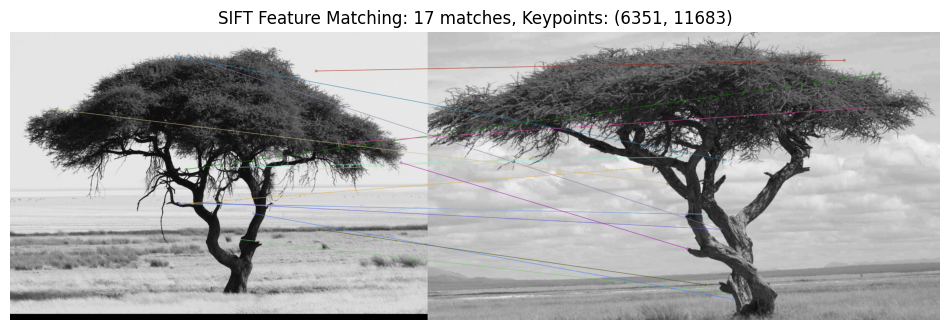

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images in grayscale
img1 = cv2.imread('acacia3.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('acacia.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Match descriptors using FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=15)
search_params = dict(checks=100)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Good matches
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

kp1_count = len(kp1)  # Get the number of keypoints in the first image
kp2_count = len(kp2)  # Get the number of keypoints in the second image

# Result
plt.figure(figsize=(12, 9))
plt.title(f"SIFT Feature Matching: {len(good_matches)} matches, Keypoints: ({kp1_count}, {kp2_count})")
plt.imshow(result)
plt.axis('off')
plt.show()

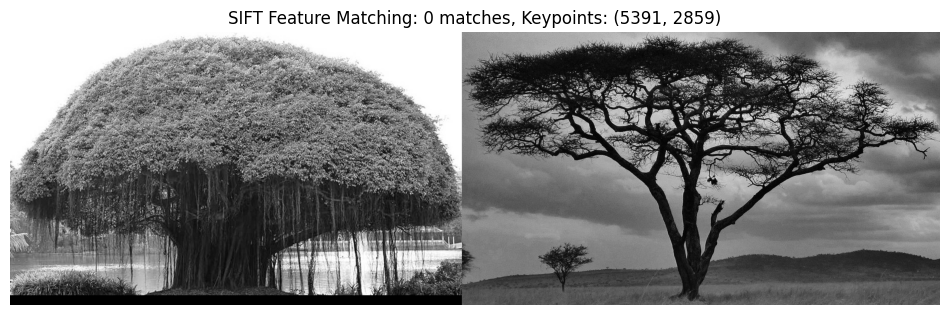

In [51]:
# Load the images in grayscale
img1 = cv2.imread('banyan.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('acacia2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Match descriptors using FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=10)
search_params = dict(checks=100)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)

# Good matches
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

kp1_count = len(kp1)  # Get the number of keypoints in the first image
kp2_count = len(kp2)  # Get the number of keypoints in the second image

# Result
plt.figure(figsize=(12, 9))
plt.title(f"SIFT Feature Matching: {len(good_matches)} matches, Keypoints: ({kp1_count}, {kp2_count})")
plt.imshow(result)
plt.axis('off')
plt.show()